# Title

## 1 Introduction
- text
- image(?)

## 2 Preliminary Results

In [13]:
# import library
library(tidyverse)
library(cowplot)

options(repr.plot.width = 20, repr.plot.height = 10)

### 2.1 Reading the dataset from web

In [14]:
cancer <- read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv')

Rows: 116 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (10): Age, BMI, Glucose, Insulin, HOMA, Leptin, Adiponectin, Resistin, M...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [15]:
head(cancer)

Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
48,23.50000,70,2.707,0.4674087,8.8071,9.702400,7.99585,417.114,1
83,20.69049,92,3.115,0.7068973,8.8438,5.429285,4.06405,468.786,1
82,23.12467,91,4.498,1.0096511,17.9393,22.432040,9.27715,554.697,1
68,21.36752,77,3.226,0.6127249,9.8827,7.169560,12.76600,928.220,1
86,21.11111,92,3.549,0.8053864,6.6994,4.819240,10.57635,773.920,1
49,22.85446,92,3.226,0.7320869,6.8317,13.679750,10.31760,530.410,1


**Table2.1** Breast cancer dataset with columns `Age` ($years$), `BMI` ($kg/m^{2}$), `Glucose` ($mg/dL$), `Insulin` ($\mu U/mL$), `HOMA` (Homeostatic Model Assessment), `Leptin` ($ng/mL$), `Adiponectin` ($\mu g/mL$), `Resistin` ($ng/mL$), `MCP-1` (Monocyte Chemoattractant Protein-1 in $pg/dL$), and `Classification` (1 = Healthy controls, 2 = Patients)

### 2.2 Wrangling the data
We are interested in comparing the healthy controls and the patients, so we split `cancer` into `control` (`Classification` == 1), and `patient` (`Classification` == 2).

In [16]:
control <- cancer %>%
    filter(Classification == 1) %>%
    select(!Classification)

In [17]:
head(control)

Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
48,23.50000,70,2.707,0.4674087,8.8071,9.702400,7.99585,417.114
83,20.69049,92,3.115,0.7068973,8.8438,5.429285,4.06405,468.786
82,23.12467,91,4.498,1.0096511,17.9393,22.432040,9.27715,554.697
68,21.36752,77,3.226,0.6127249,9.8827,7.169560,12.76600,928.220
86,21.11111,92,3.549,0.8053864,6.6994,4.819240,10.57635,773.920
49,22.85446,92,3.226,0.7320869,6.8317,13.679750,10.31760,530.410


In [18]:
patient <- cancer %>%
    filter(Classification == 2) %>%
    select(!Classification)

In [19]:
head(patient)

Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
45,21.30395,102,13.852,3.4851632,7.6476,21.056625,23.03408,552.444
45,20.83000,74,4.560,0.8323520,7.7529,8.237405,28.03230,382.955
49,20.95661,94,12.305,2.8531193,11.2406,8.412175,23.11770,573.630
34,24.24242,92,21.699,4.9242264,16.7353,21.823745,12.06534,481.949
42,21.35991,93,2.999,0.6879706,19.0826,8.462915,17.37615,321.919
68,21.08281,102,6.200,1.5599200,9.6994,8.574655,13.74244,448.799


In [30]:
# create a function for generating control v.s. patient plots with variable s
control_vs_patient_plots <- function(s) {
    control_s_dist <- control %>%
        ggplot(aes_string(x = s)) +
        geom_histogram(binwidth = 2) + 
        labs(x = s, title = paste('Distribution of Healthy Control', s)) +
        theme(text = element_text(size=20))
    
    patient_s_dist <- patient %>%
        ggplot(aes_string(x = s)) +
        geom_histogram(binwidth = 2) + 
        labs(x = s, title = paste('Distribution of Patient', s)) +
        theme(text = element_text(size=20))
  return(plot_grid(control_s_dist, patient_s_dist))
}

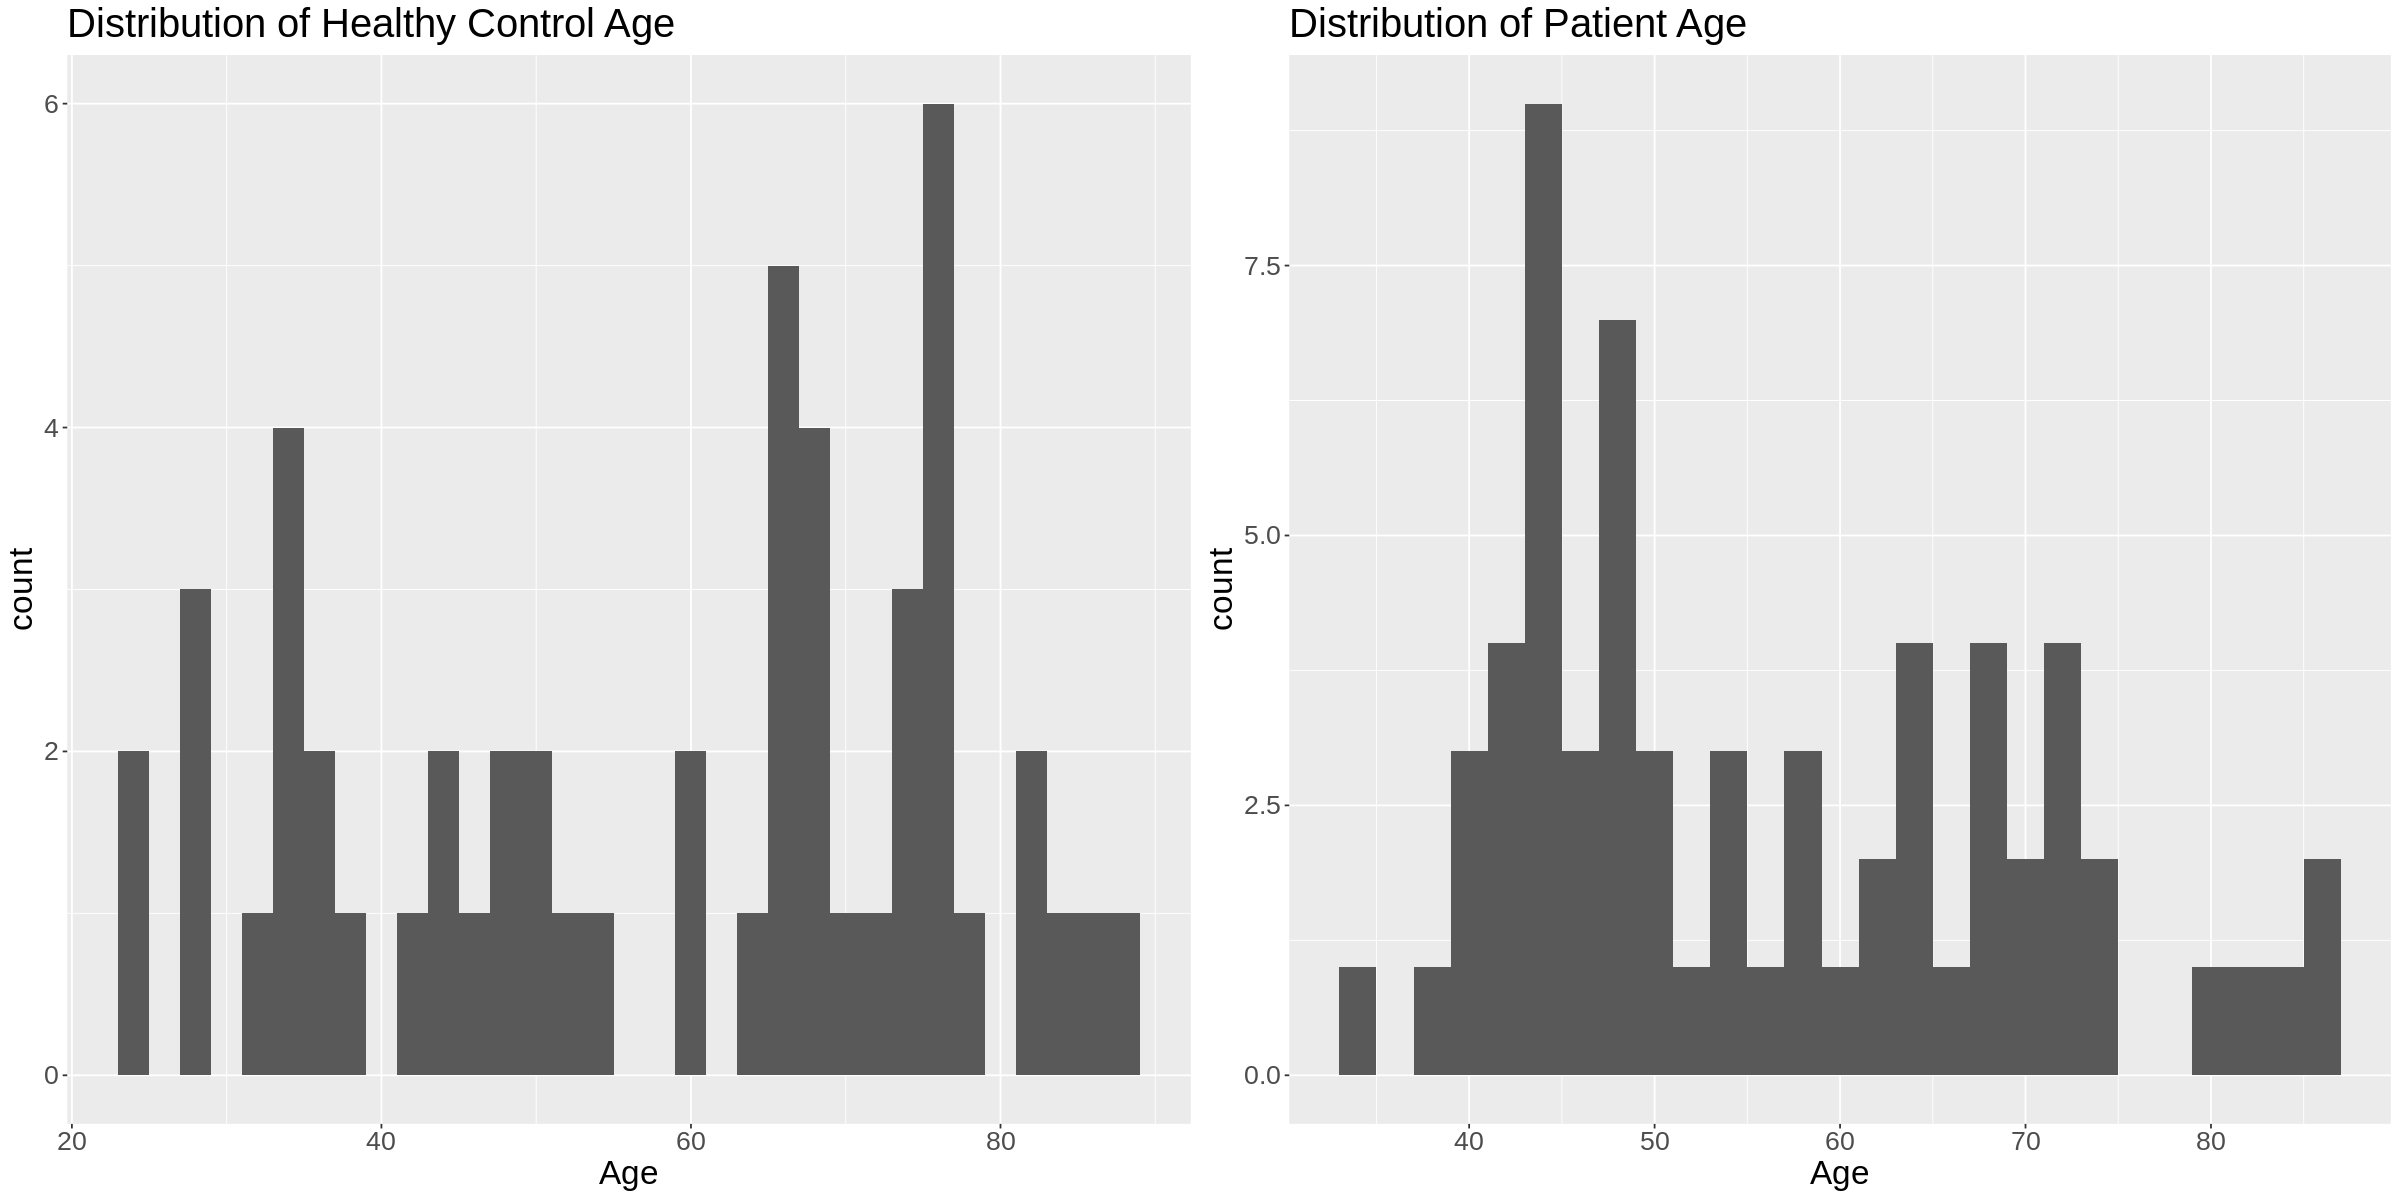

In [31]:
control_vs_patient_plots("Age")

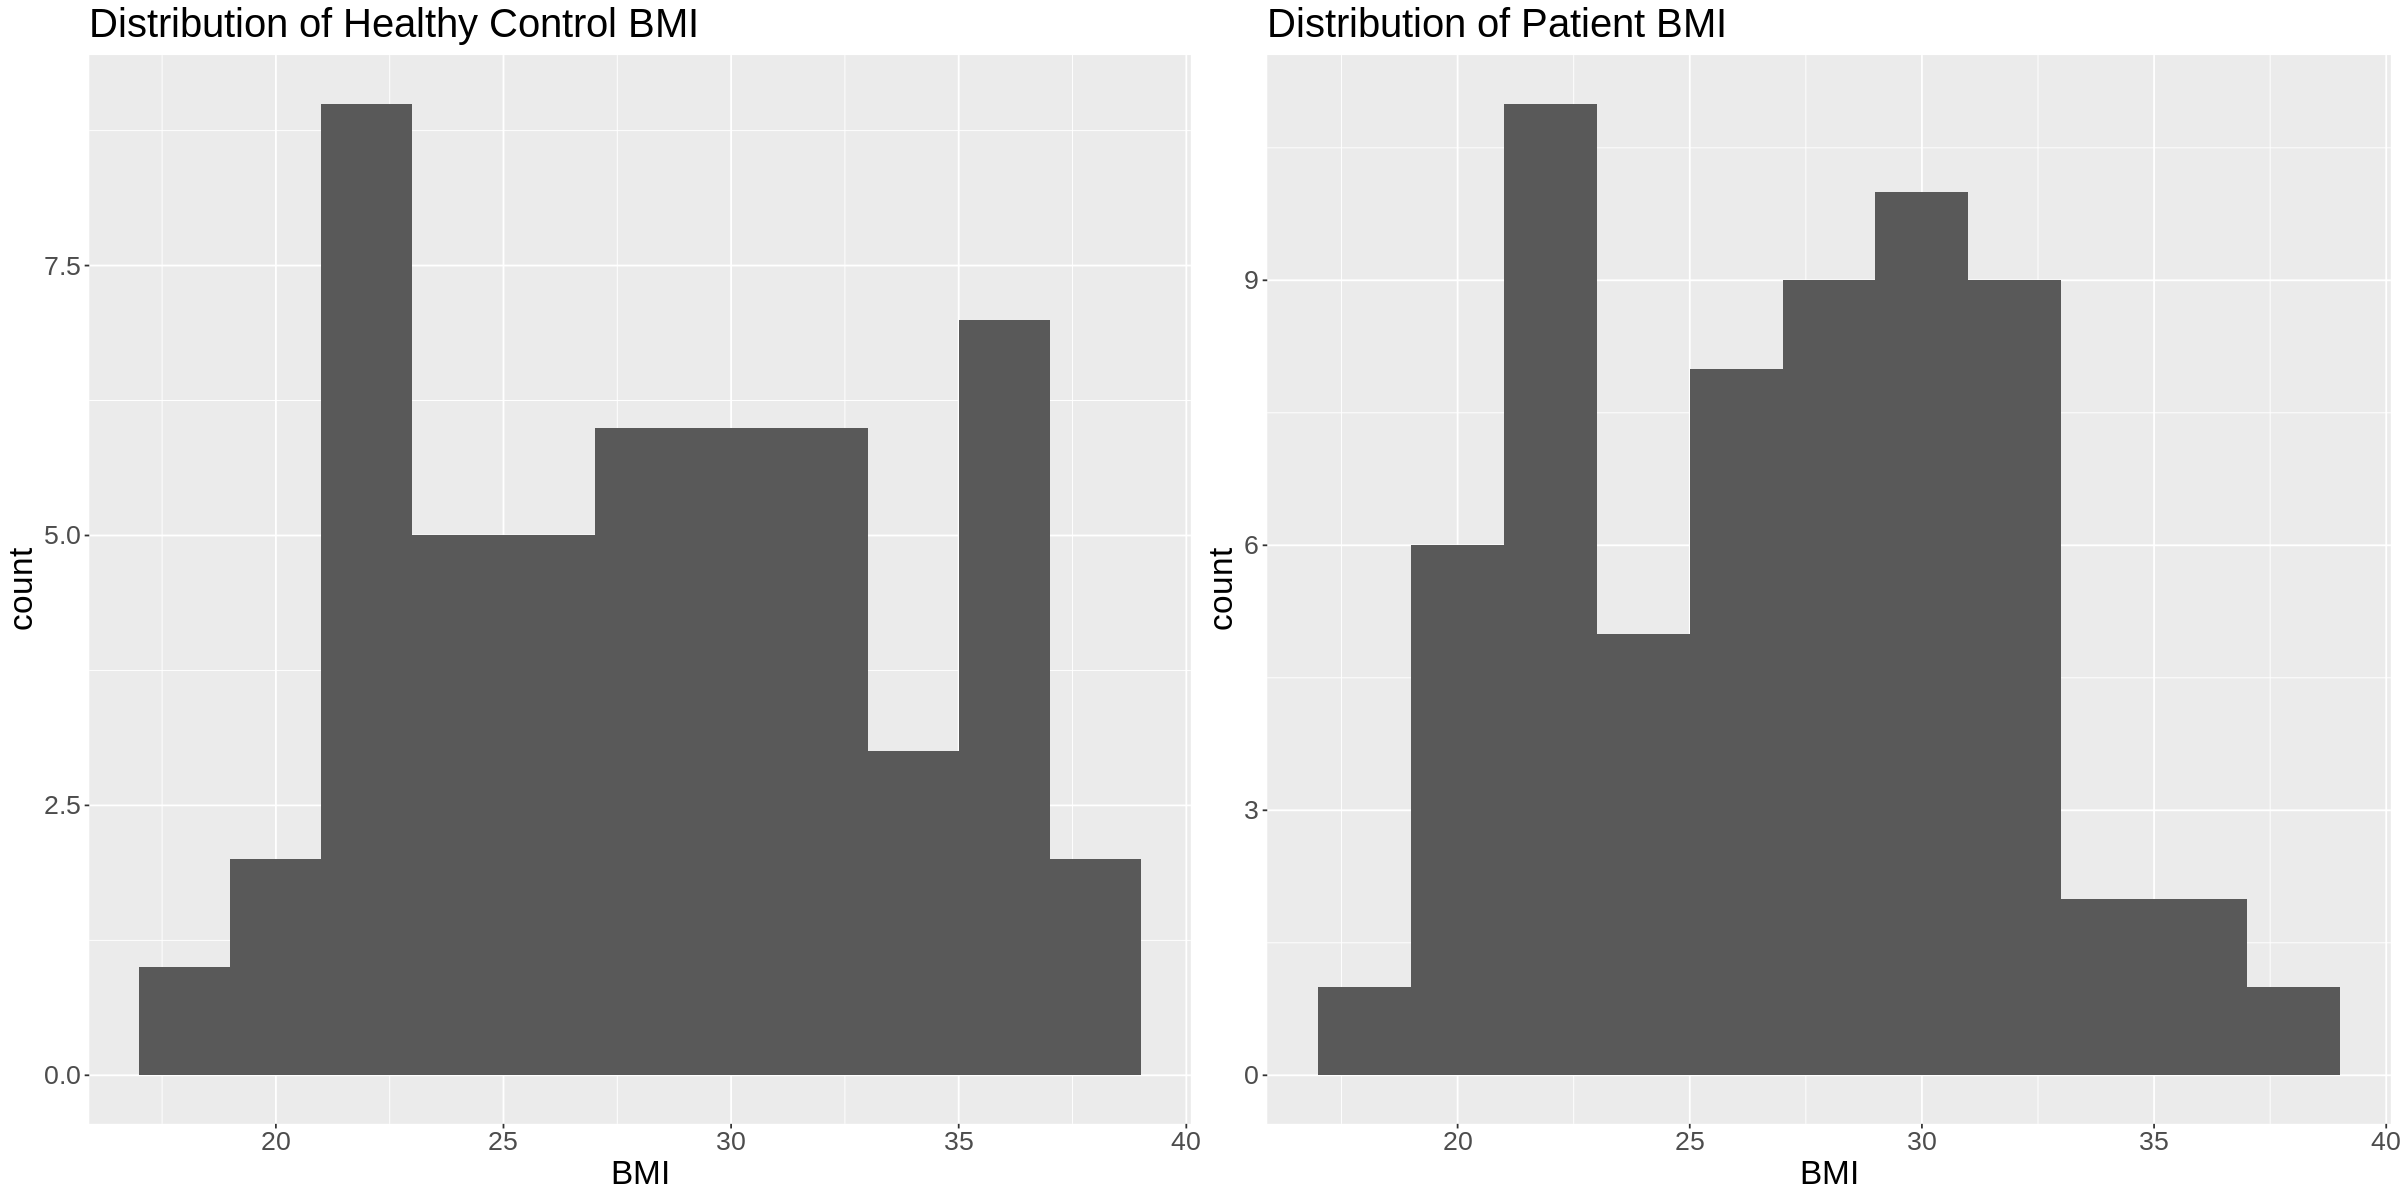

In [32]:
control_vs_patient_plots("BMI")

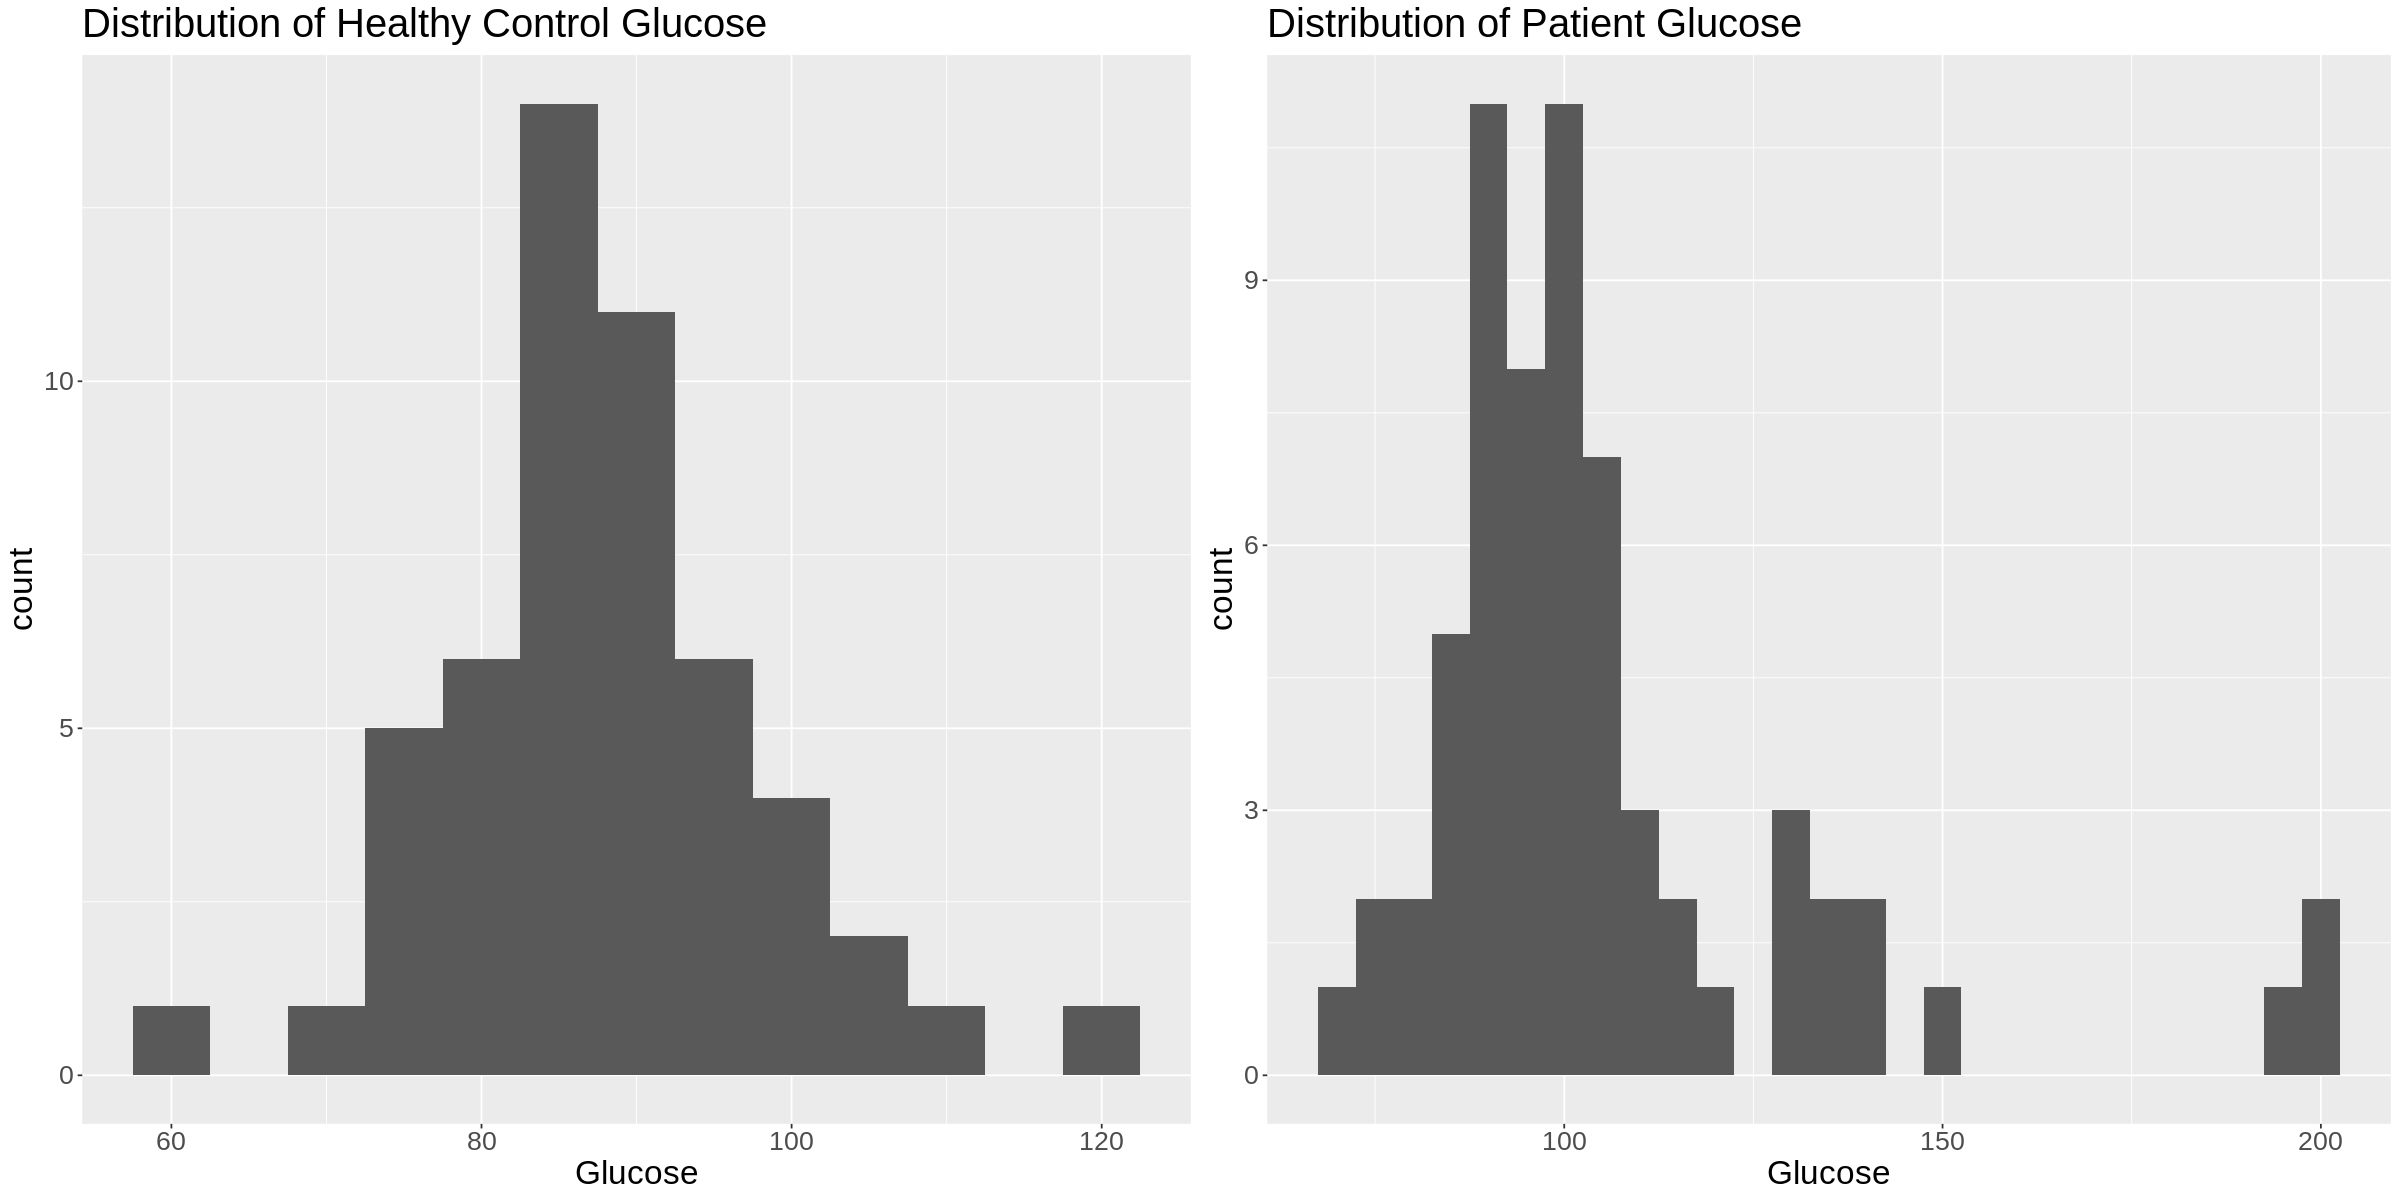

In [189]:
control_vs_patient_plots("Glucose")

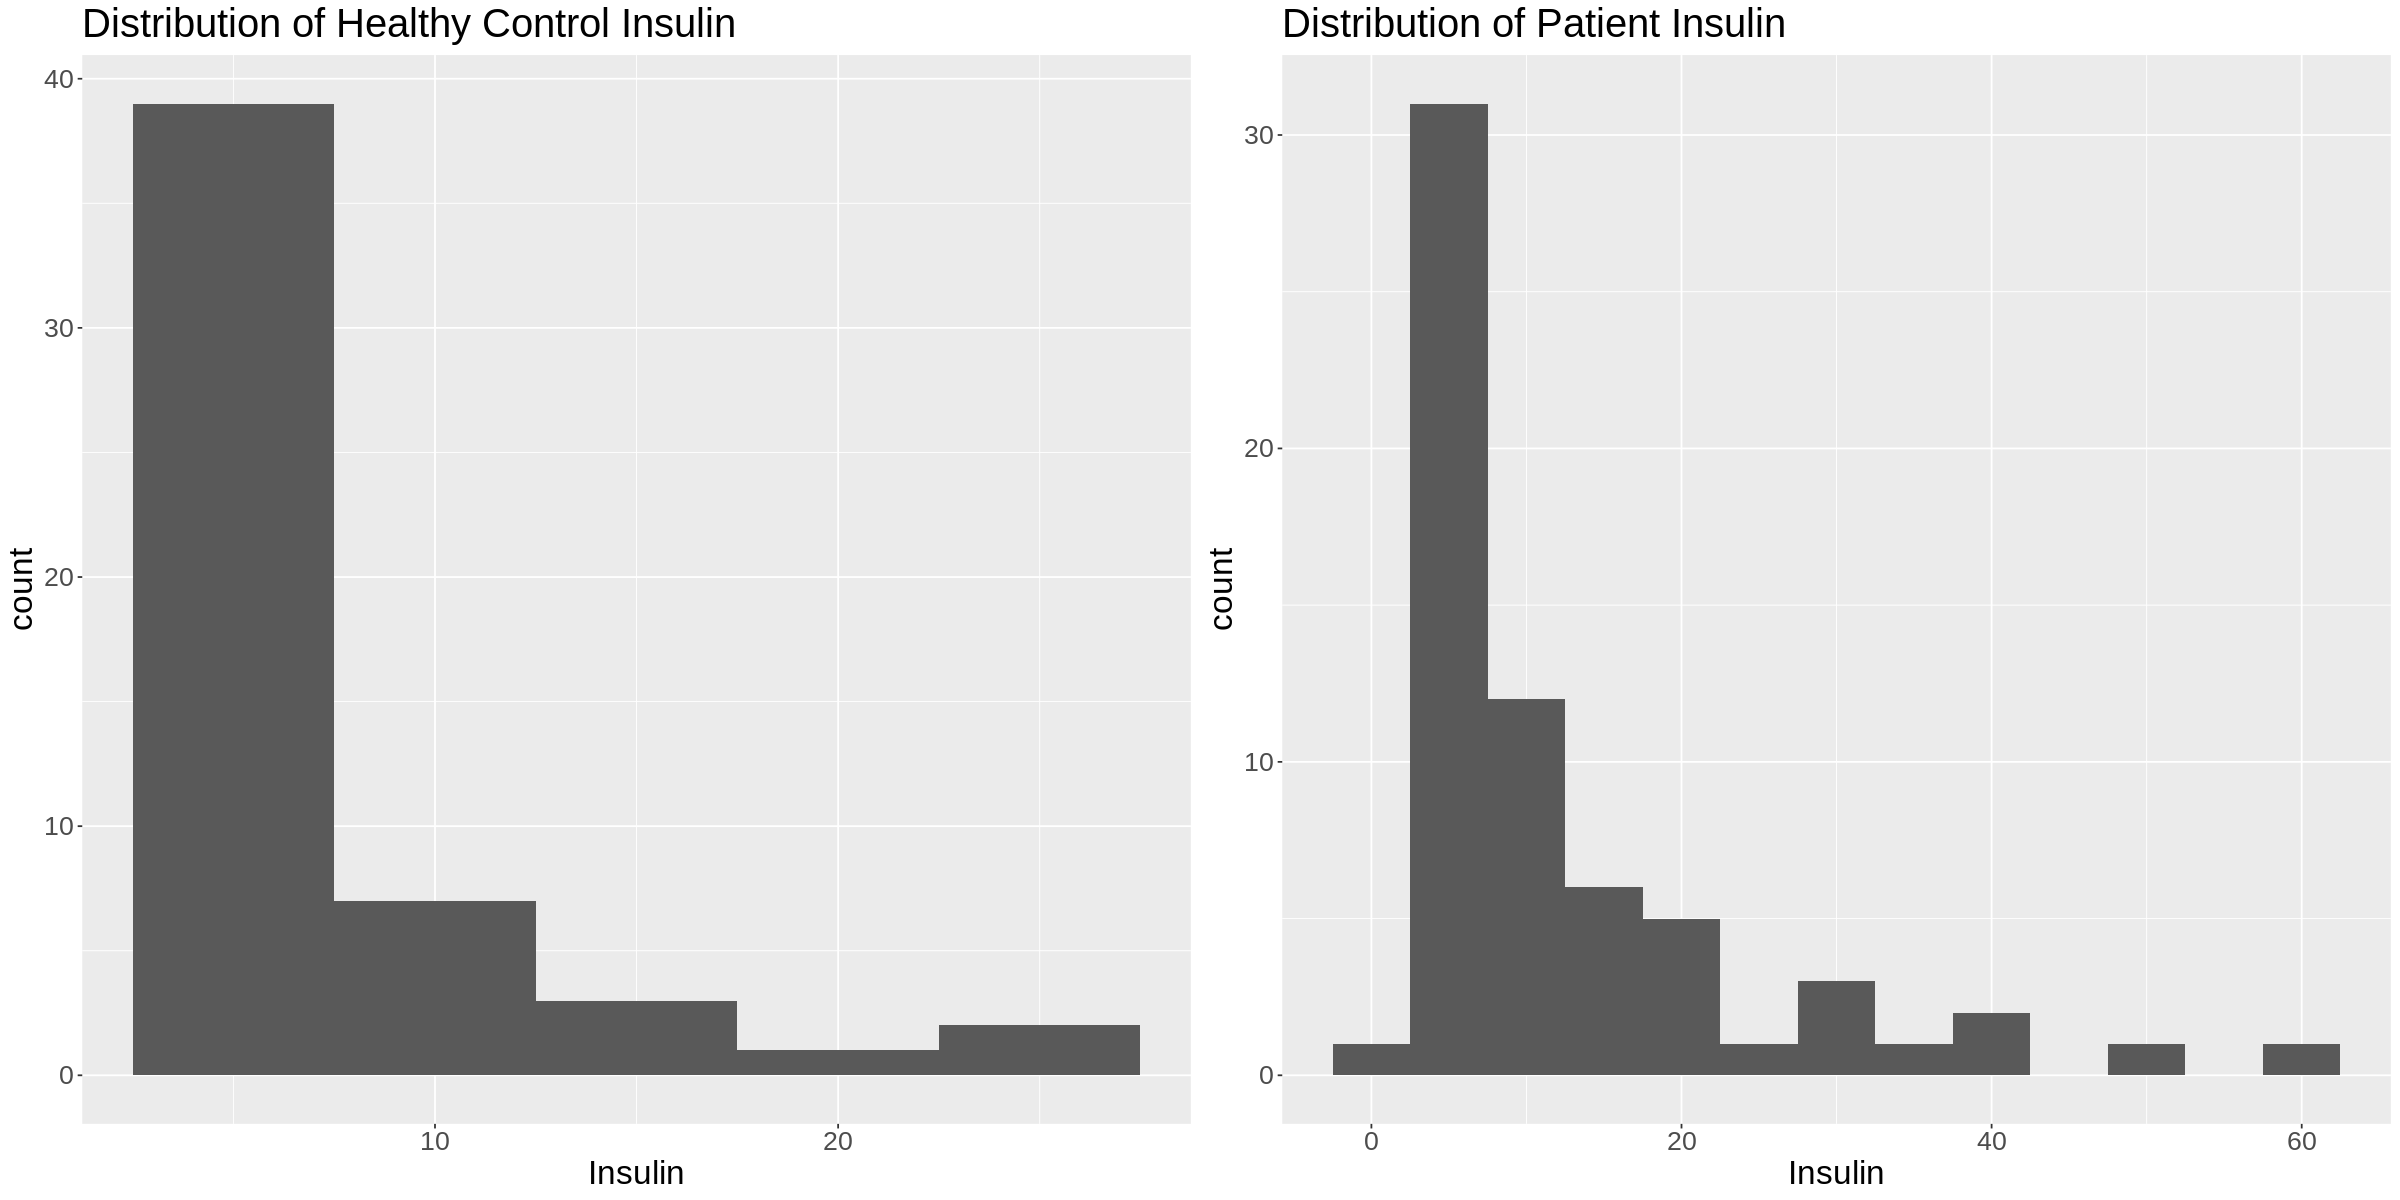

In [190]:
control_vs_patient_plots("Insulin")

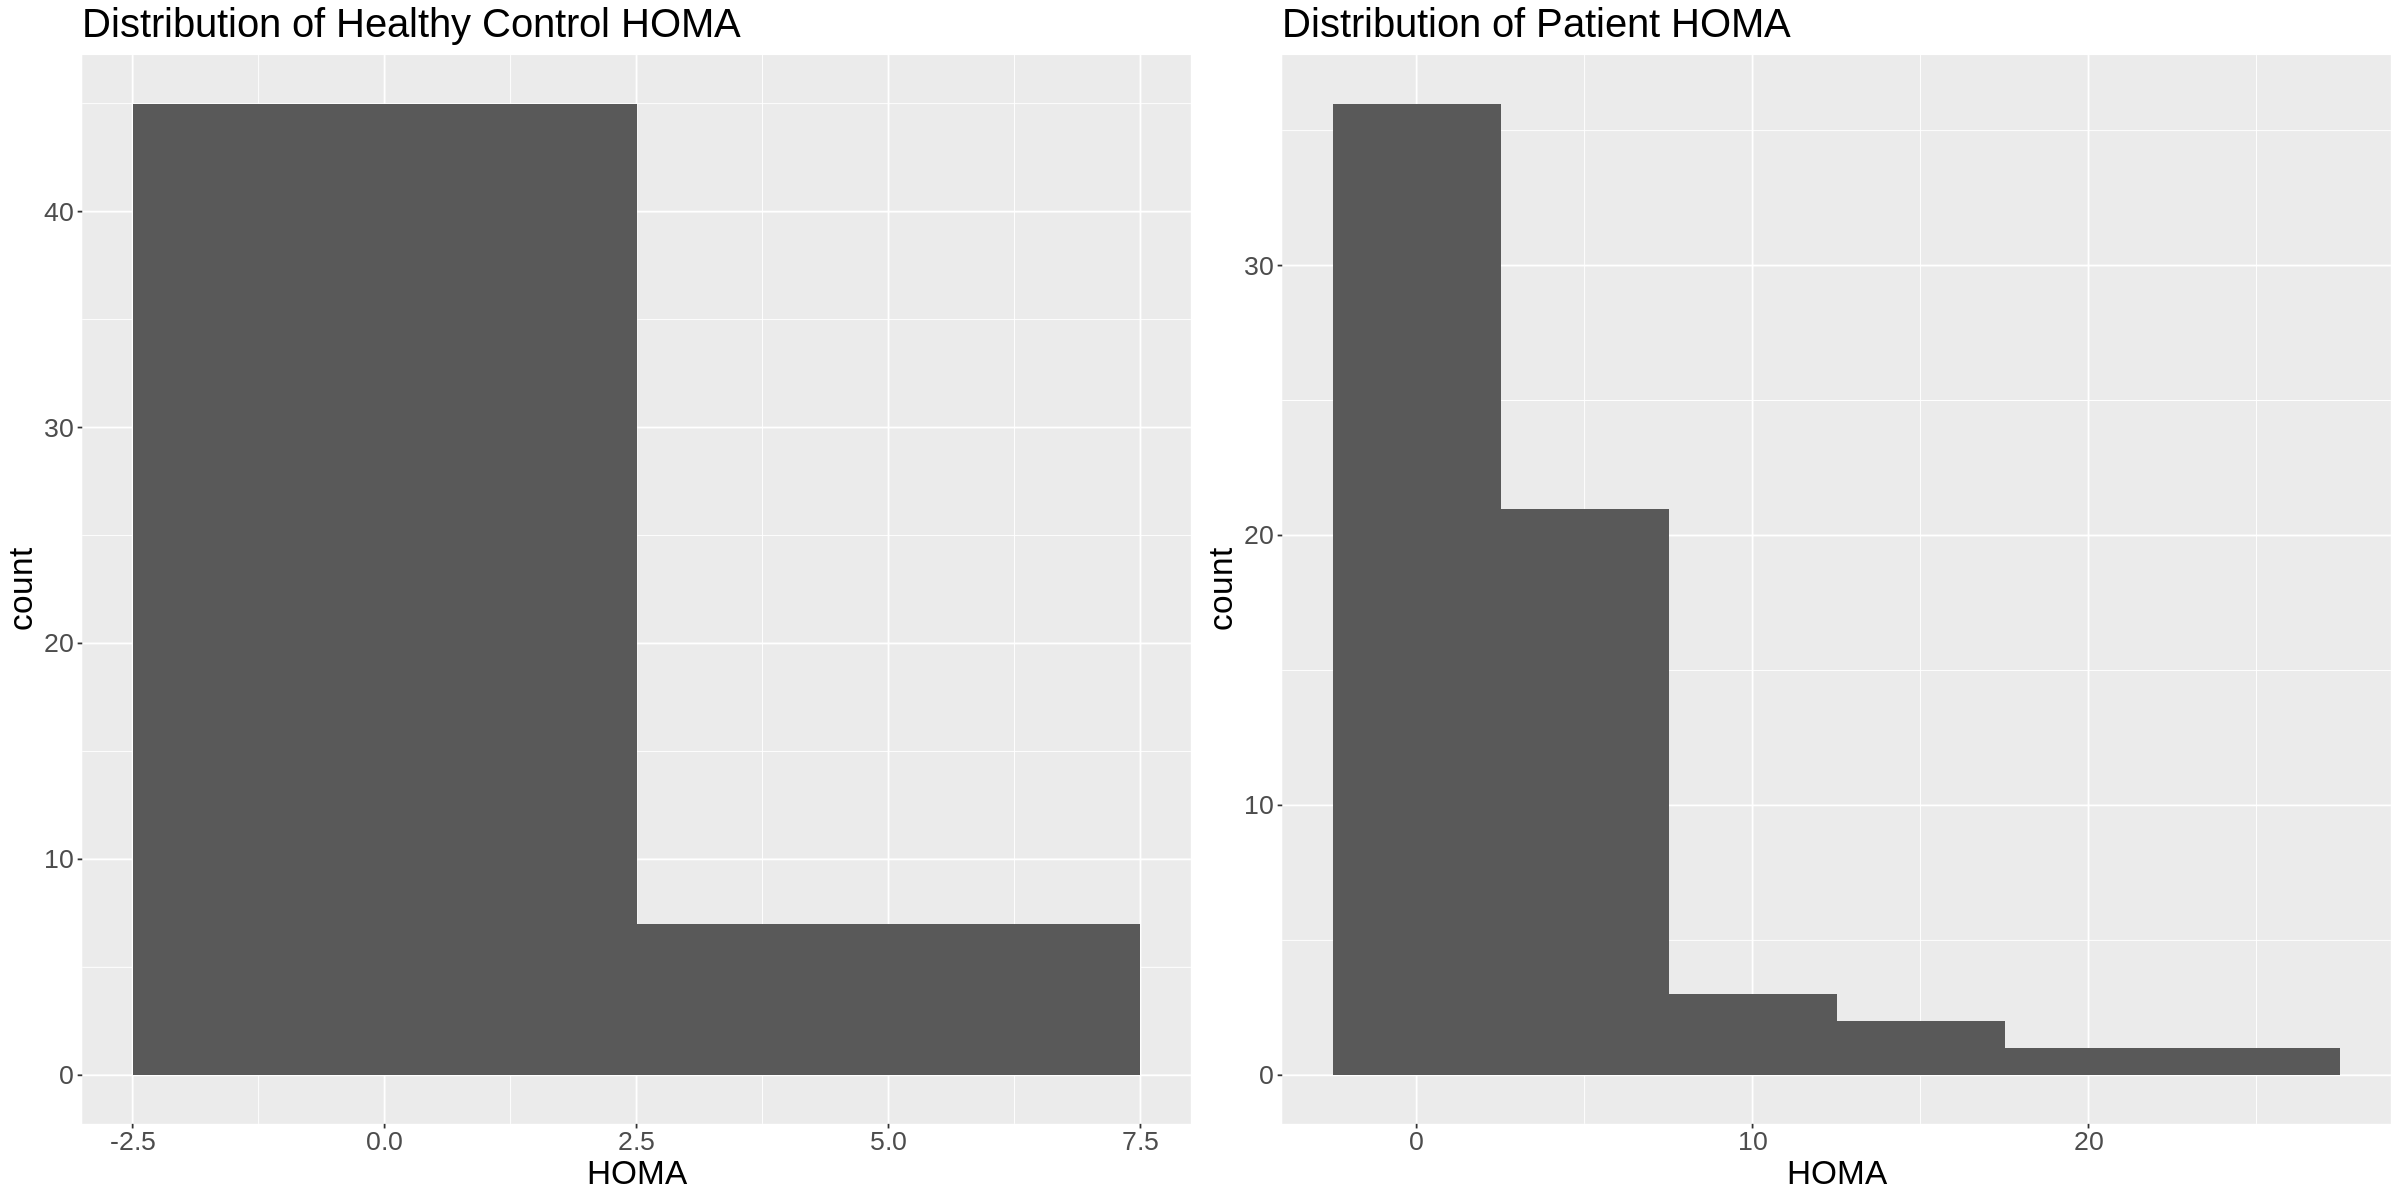

In [191]:
control_vs_patient_plots("HOMA")

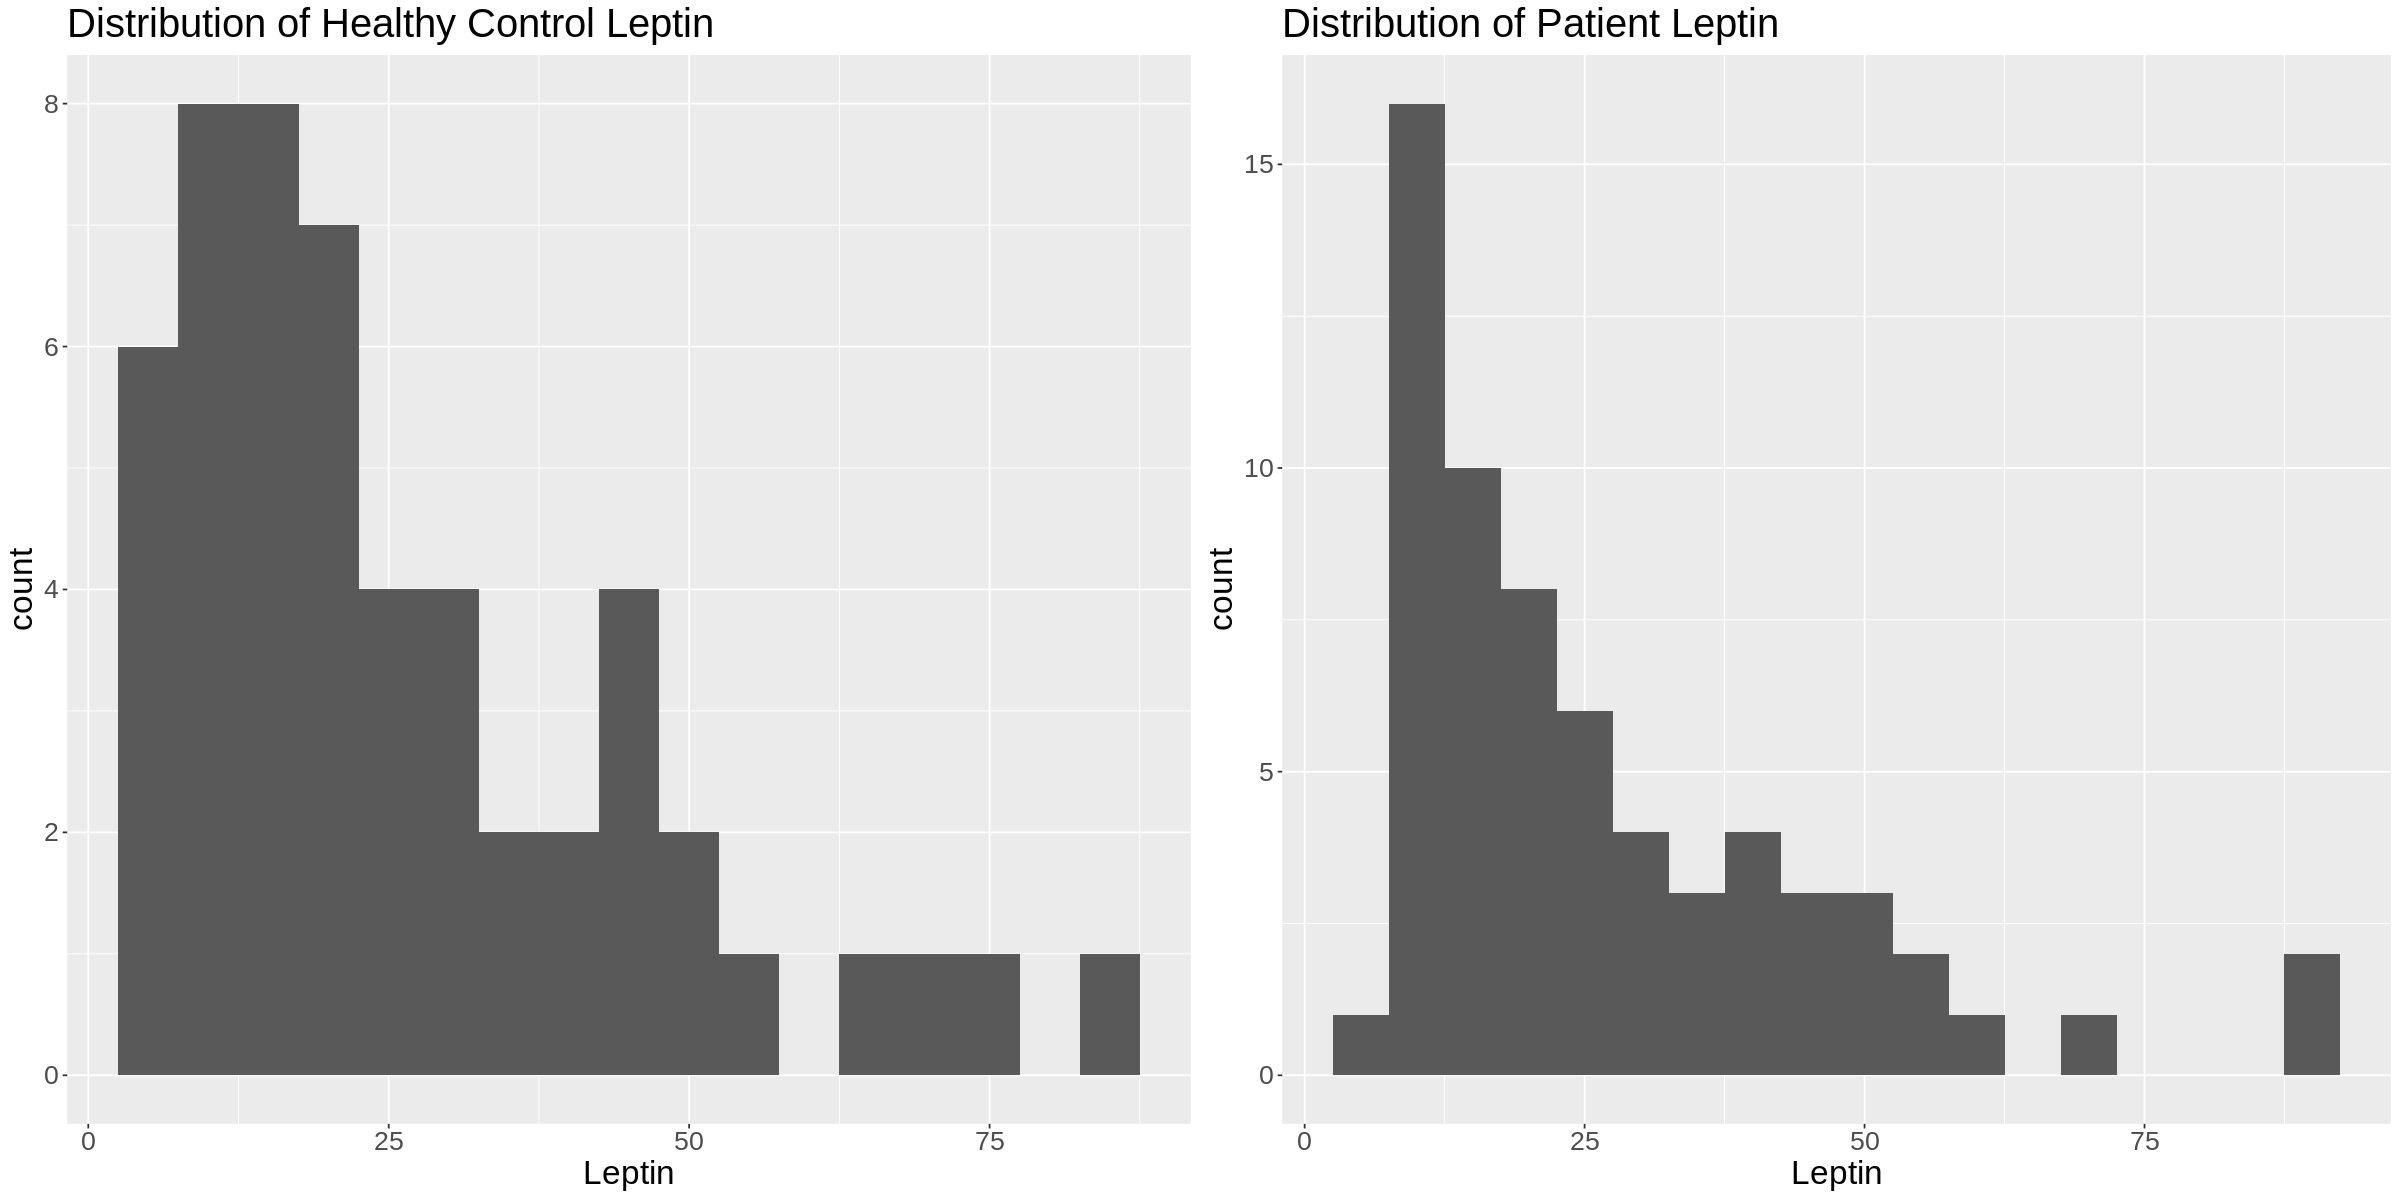

In [192]:
control_vs_patient_plots("Leptin")

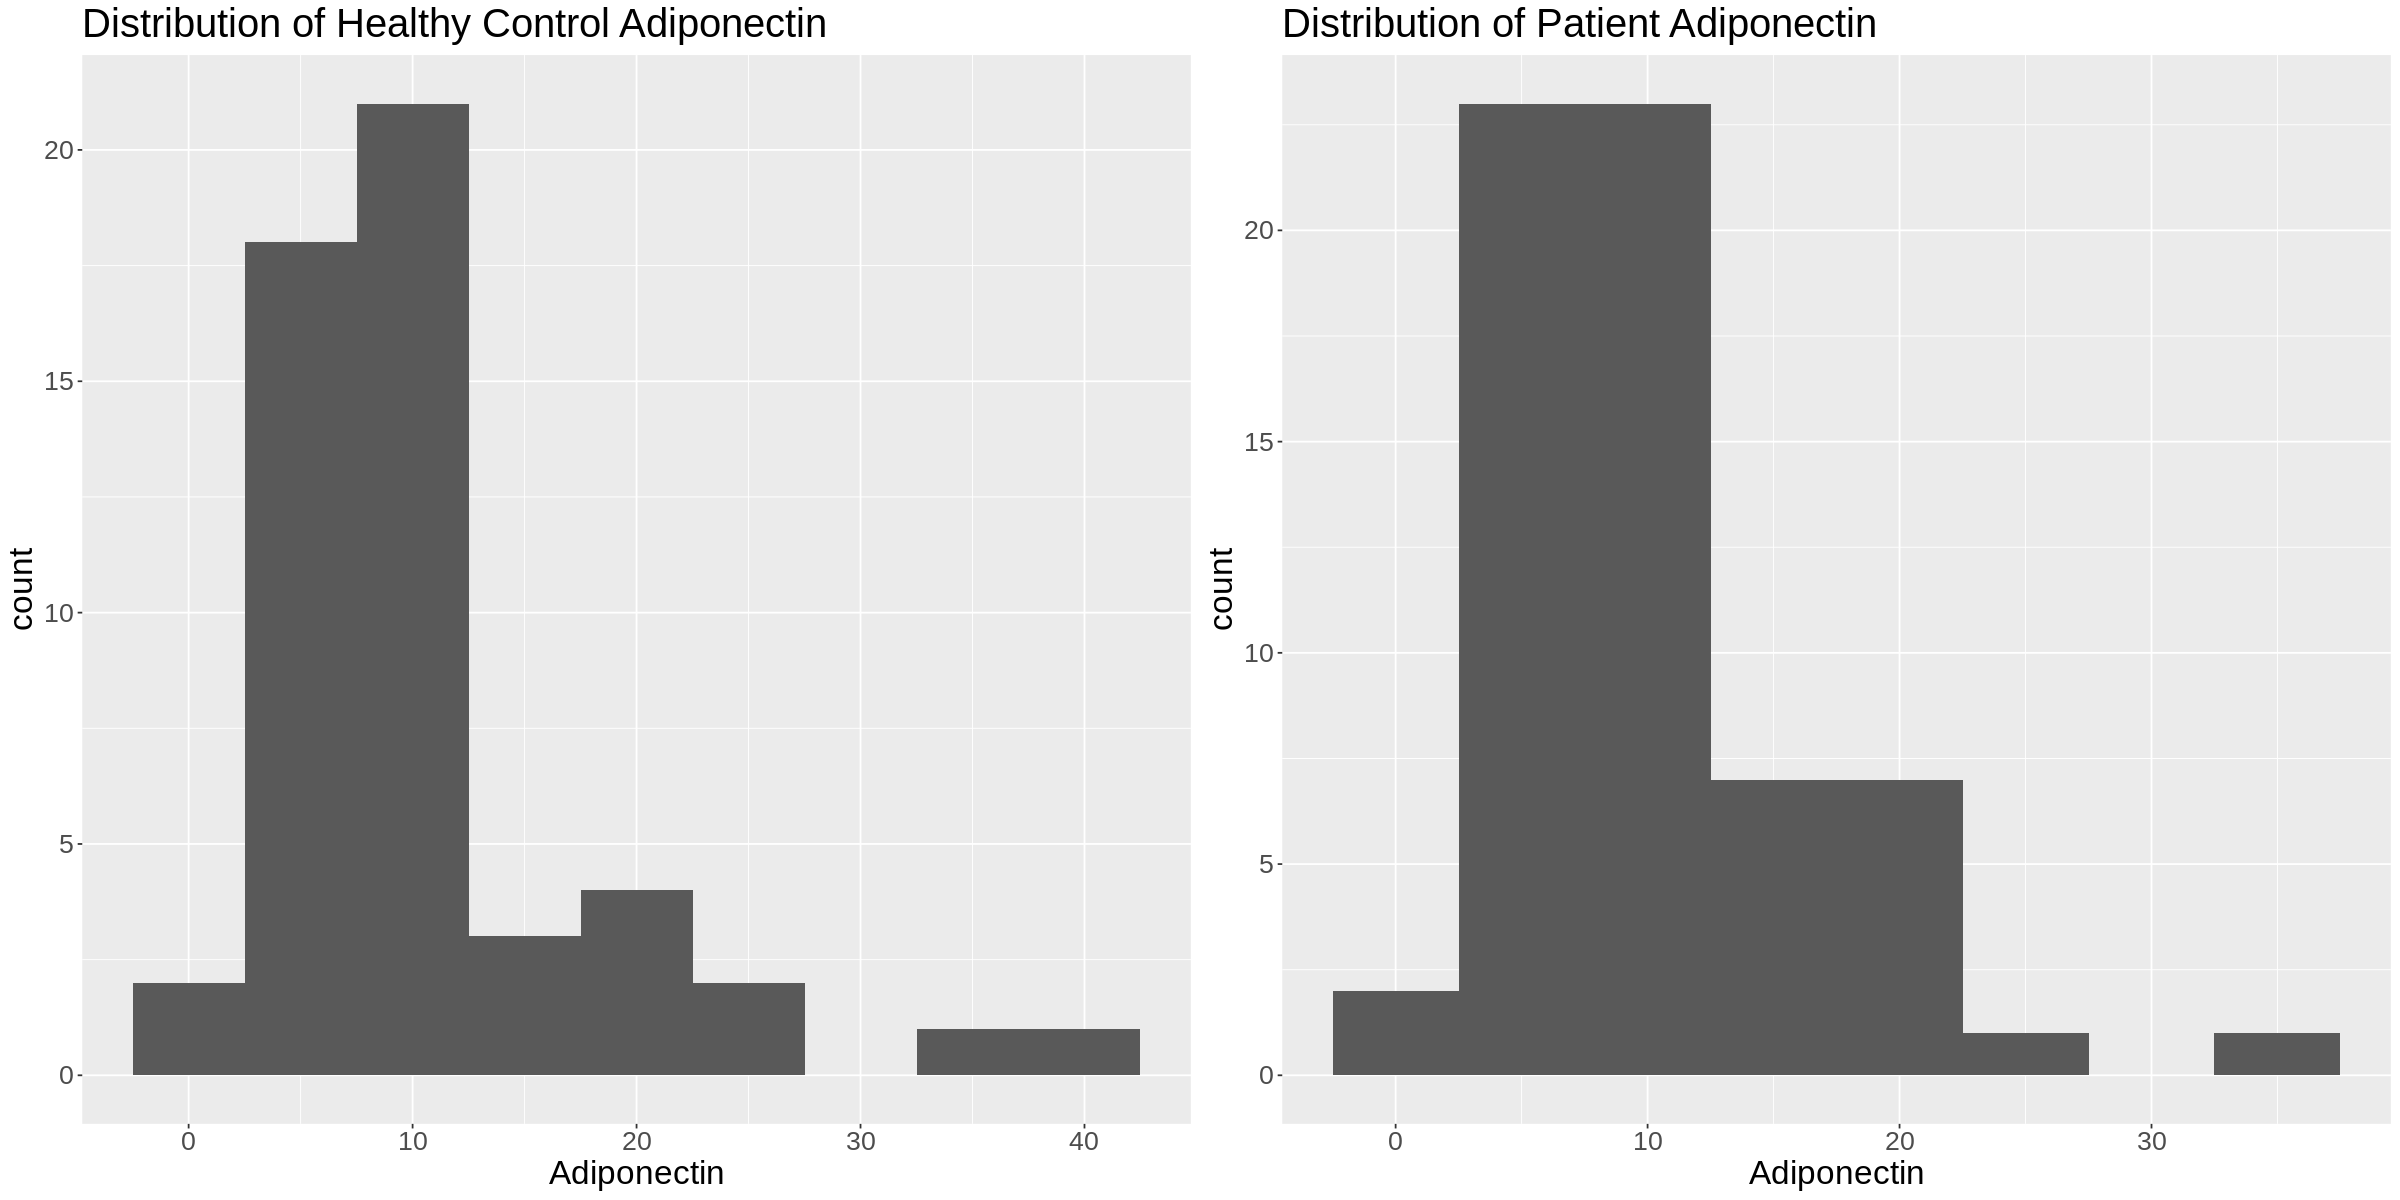

In [193]:
control_vs_patient_plots("Adiponectin")

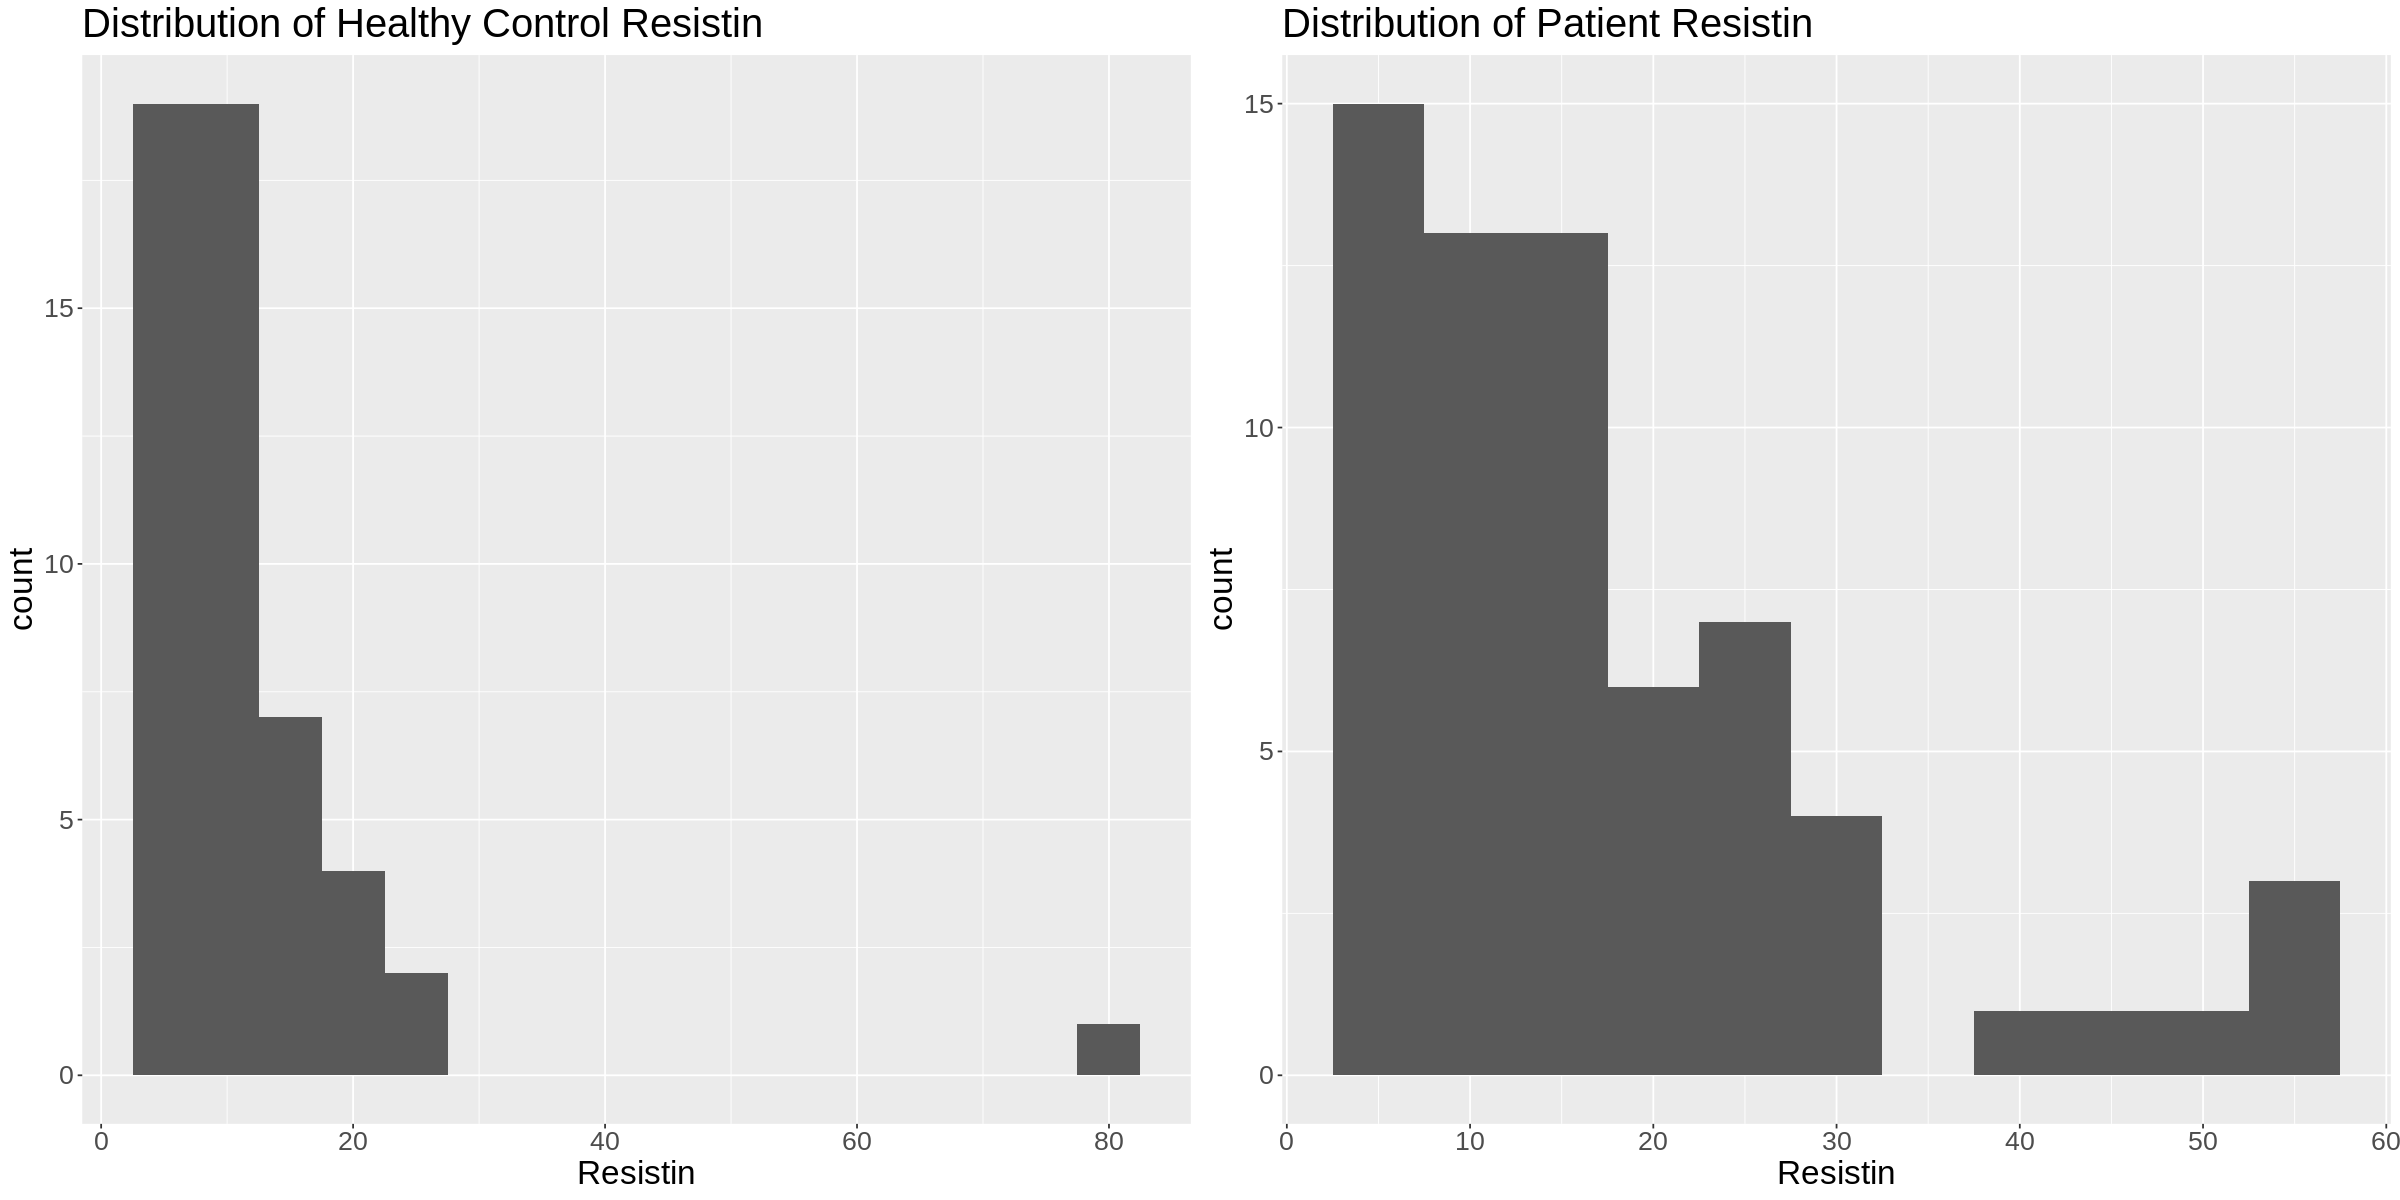

In [195]:
control_vs_patient_plots("Resistin")

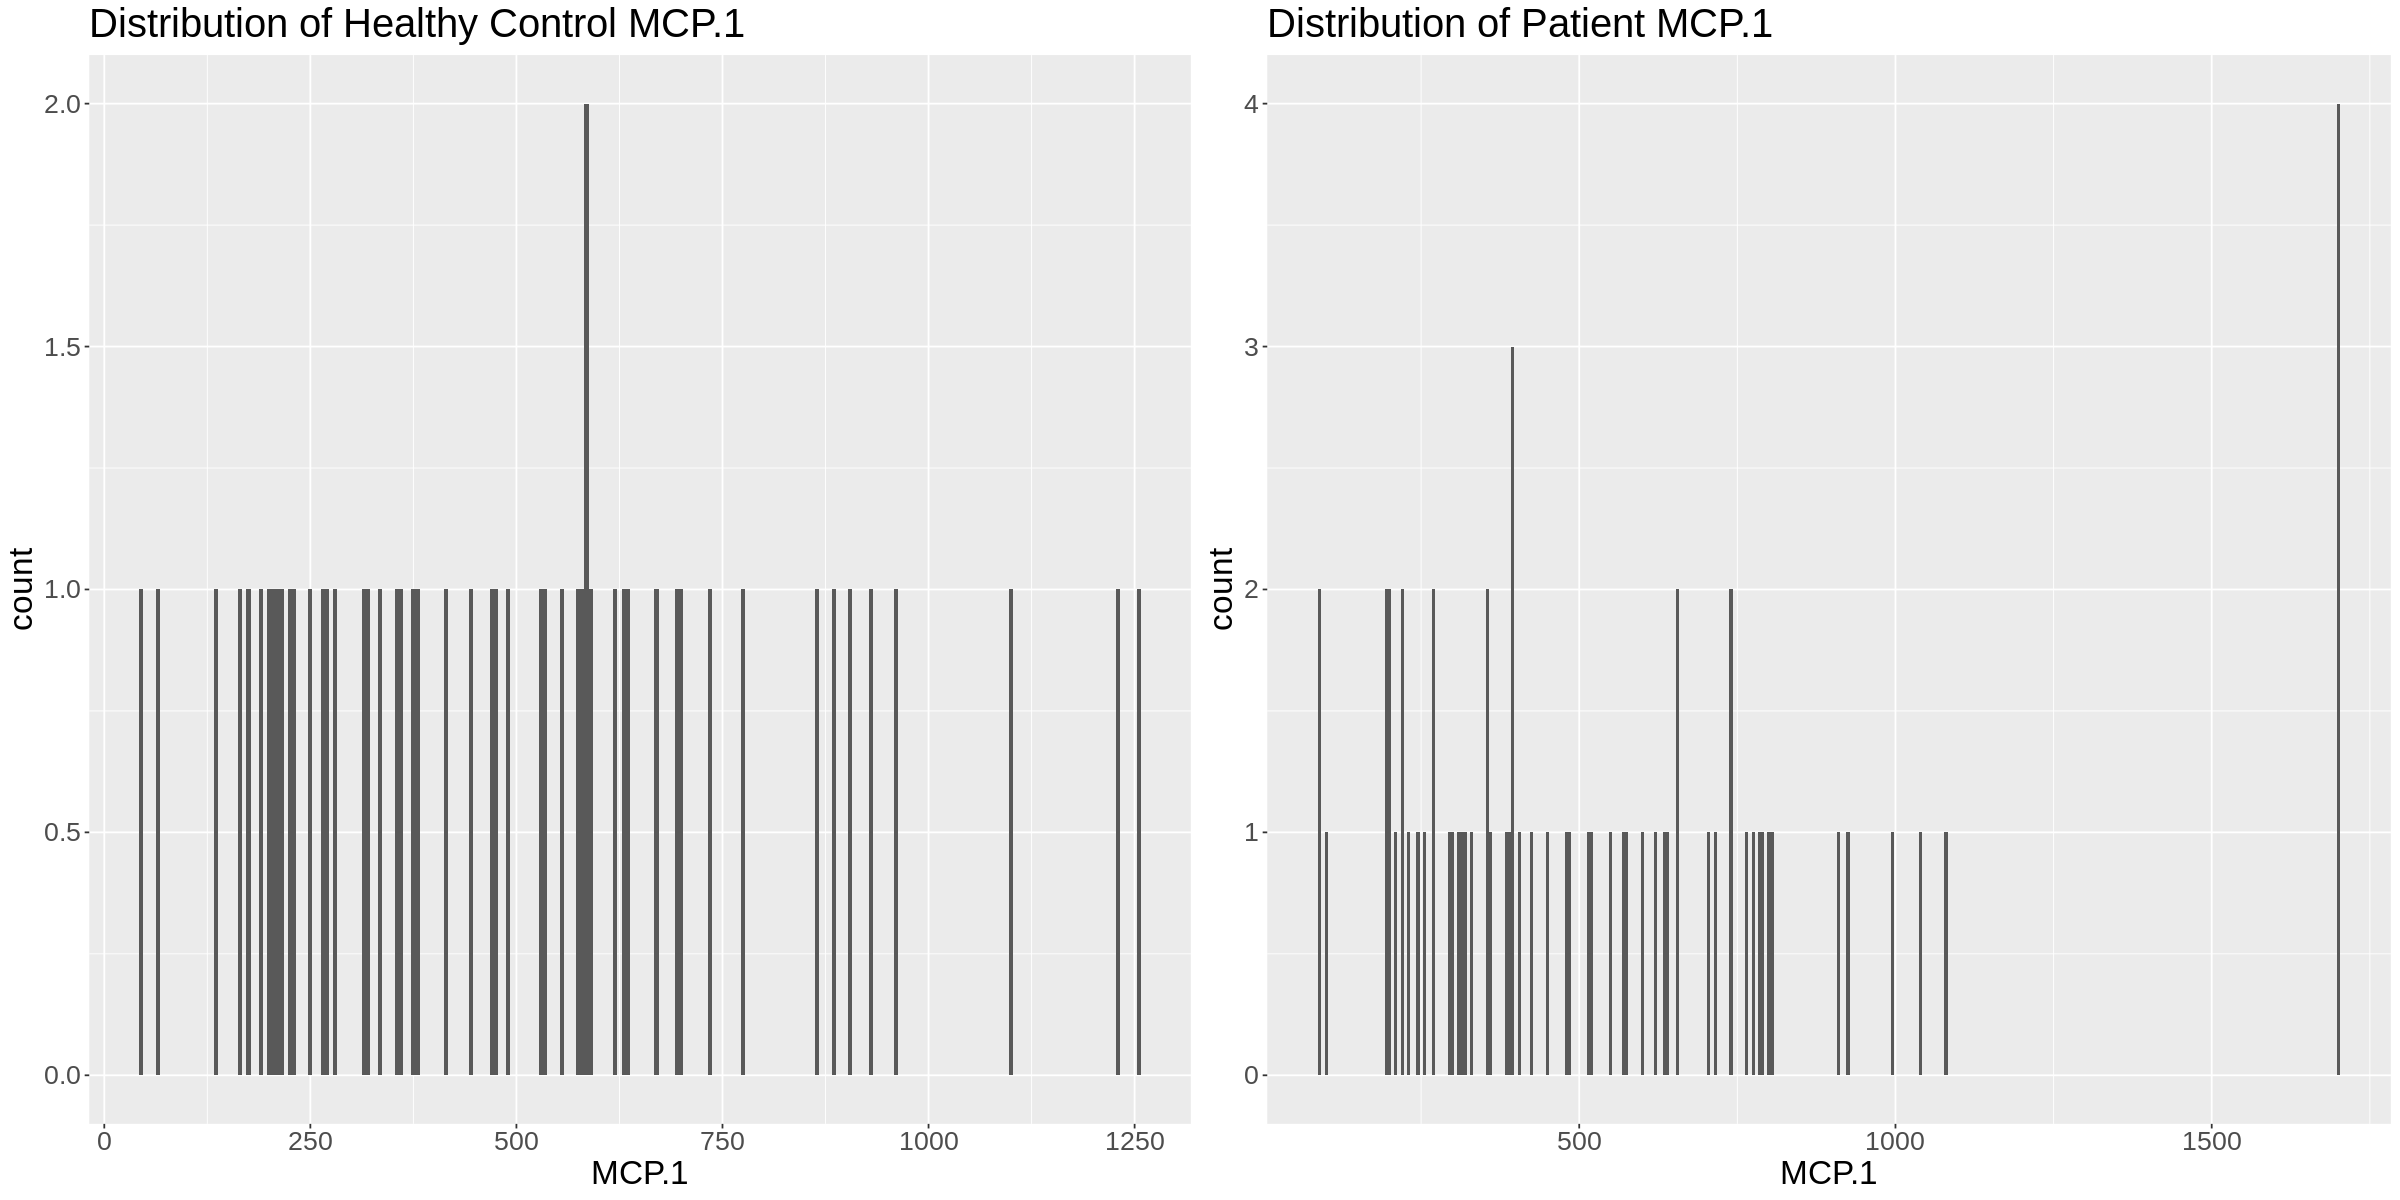

In [196]:
control_vs_patient_plots("MCP.1")